# I'm brandy-new to code... what the hell am I looking at?

This thing you're viewing is called a `Jupyter Notebook`. Jupyter is an acronym for the programming languages Julia, Python, and R.
It allows you to run code from a browser, and is really useful for exploratory data science. [Here's a more thorough/complete explanation](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).

I personally like jupyter notebooks because:
- Tolerant of incompleteness and bullshit wannabe-code while you work through ideas.
- Combine concepts and explanations right along side the code for a presentation such as this.
- Easy to try with:
    - [Try Jupyter](https://jupyter.org/try) (click on Jupyter Notebook)
    - [Google's Colaboratory](https://colab.google/) (click on New Notebook),
    - A computer program/coding environment like [Anaconda](https://www.anaconda.com/download) (what I use)



There will be lots of *scary-scary* code, so if you want to see the *sexy-sexy* stuff, skip to the bottom! Don't be too intimidated by the code 😱, if you read through it, it might actually make a little sense, even if you don't know quite what it does. This code wasn't written perfectly in the form you now see it. This is a garbage sentence meant as filler, or so you think twice about skipping over parts, lest you miss the good stuff. As I was saying, there were lots of mistakes and a healthy bit of swearing. I leaned on google heavily for almost every part of the code... you don't know what you're doing? Well, neither did/do I. Nod appreciatively, sprinkle in a "Hmm, yes, interesting" every once in a while, and you'll fit in with the rest of us imposters ;)


### The code below

In the code cell below you'll see `!pip install ...`. the `!` allows you to run a command as if it's in the terminal/bash window, and the `pip install ...` allows you to load in a **library/package** for python... which begs the question: **What is a library?** Think of it like Photoshop, or Excel - but for python. Just allows you to do things with a dedicated tool.


Once we've `pip install`ed it, then we tell python to `import` that library's code - which allows us to use it.

In [ ]:
!pip install playwright --upgrade
!playwright install
import playwright
from playwright.async_api import async_playwright

# <- that means this is a comment, aka don't run this line

# Get the data

## Scraping Prelim data from https://scoring.dance
Since there's no API for us or python to access the data programmatically, I opted to use web scraping with a library called `playwright`!

Web scraping is great for accessing website data and clicking on buttons like a regular person browsing the interwebz. It can be fiddly though, as you have to tell the automated browser which things to click on. Fortunately, playwright + developer tools makes this fairly easy. A disadvantage to webscraping is that websites update frequently, so while it works when you make it, they might move a button later which breaks your code. API's usually have a set format that rarely, if ever, changes.

You can see below that I'm using the `async` version of playwright. This is likely because it's what I was using before, and I was too lazy to change it. It also allows me to convert this process to async in the future (if I want it to be faster). This unfortunately means we'll have to annoyingly sprinkle our code with the `await` command before some of the code can run.

[This is video I learned from](https://youtu.be/lvFAuUcowT4?si=rYiOJHC4_Gdi26Ho&t=130), it uses `selenium` instead of `playwright` as the automated browser, but the concept is the same. Don't worry too much about why his programming environment looks differ

In [1]:
playwright = await async_playwright().start()                #the 'program'
browser = await playwright.chromium.launch(headless=False)   #the 'browser' - we're using chromium
context = await browser.new_context()                        #the 'tab'

page = await context.new_page()                              #the 'tab'
await page.goto('https://scoring.dance/enUS/?hype=1')        #goes to the site we want

<Response url='https://scoring.dance/enUS/?type=1' request=<Request url='https://scoring.dance/enUS/?type=1' method='GET'>>

### What is `async`?

* Asynchronous code essentially means **waiting in parallel** - particularly useful for I/O operaions which require waiting for another system (such as a waiting for a webpage to load)

* It basically sends out a bunch of requests for pages, waits for them all to load, and then collects all the results once they're done - *as opposed to requesting each website one at a time, and waiting for the stupid thing to load before requesting the next webpage*.

* `async` shouldn't be confused with `parallel processing` which is *drumroll*... **processing in parallel** - useful for processing multiple things at once. Yes, you can combine them for much faster, and more complex, code

* That being said, I have not inplemented async properly here because it's more complicated to write, read, and unfuck. Ultimately it's because I'm lazy and this was good enough, your welcome!

This, pops up a convenient window for recording mouseclicks, which field you filled out, etc.
(You'll have to unpause it to continue doing things in the cells below. Feel free to click the buttons and fiddle with it.)

In [2]:
await page.pause()

Below, I wanted all the a buttons/links on the page that have the text 'results'. I did this by:
* right-click on the page > `Inspect Element` > right-click on thing you want > `Copy` > `XPath`
* giving that to `page.query_selector_all()` (queries everything on the webpage that has that text)
* get the `.get_attribute('href')` (aka the link path) of each element like: **/enUS/events/140/results/**
* put `https://scoring.dance` before each of them to make it a complete link that I can use later

(Note: the `_` is just an anonymous placeholder variable for each item in the list)

In [22]:
links = await page.query_selector_all('a:has-text("results")')
event_results_urls = [f"https://scoring.dance{await _.get_attribute('href')}" for _ in links]
event_results_urls

['https://scoring.dance/enUS/events/140/results/',
 'https://scoring.dance/enUS/events/147/results/',
 'https://scoring.dance/enUS/events/139/results/',
 'https://scoring.dance/enUS/events/144/results/',
 'https://scoring.dance/enUS/events/145/results/',
 'https://scoring.dance/enUS/events/138/results/',
 'https://scoring.dance/enUS/events/137/results/',
 'https://scoring.dance/enUS/events/136/results/',
 'https://scoring.dance/enUS/events/135/results/',
 'https://scoring.dance/enUS/events/142/results/',
 'https://scoring.dance/enUS/events/134/results/',
 'https://scoring.dance/enUS/events/133/results/',
 'https://scoring.dance/enUS/events/130/results/',
 'https://scoring.dance/enUS/events/121/results/',
 'https://scoring.dance/enUS/events/127/results/',
 'https://scoring.dance/enUS/events/128/results/',
 'https://scoring.dance/enUS/events/131/results/',
 'https://scoring.dance/enUS/events/125/results/']

### All that async now goes to waste
Here, we go to each link in that list, and then find all the prelim buttons and get those links (using the same process as above for getting the XPath) - now we've got that whole path (**/enUS/events/140/results/2179.html**) for each of the prelim results!


You can see that I also add a little `time.sleep(1)` on each iteration since there's only 665 links and I don't want to get blocked by the website. It means I have to wait a few minutes. I could either make something slightly more sophisticated, or be lazy and use that time go make a smoothie.... (plus, nobody's gonna see it, right? 🤦🏻‍♂️) The `break` at the end would 'break' the loop - a leftover from when I was testing it, it'd run the first iteration/url and then stop.

### Make Websites Hate you with this One Neat Trick! 
Remember how async sends out all the requests at once, and then waits for all of them to load? It would mean slamming the website/server with 665 requests at once - kinda like everybody registering for King Swing in the first 20 seconds and bringing the site down  (DDOS). That's no bueno. And it'd be all from my one IP, so... especially no good-o. I could batch things and whatnot, but smoothie was calling.

In [21]:
import time

prelim_results_urls = []

for _ in event_results_urls:
    await page.goto(_)
    prelims_url = await page.query_selector_all('a:has-text("prelim")')
    prelim_results_urls = prelim_results_urls + [f"https://scoring.dance{await _.get_attribute('href')}" for _ in prelims_url]
    time.sleep(1)
    # break

print(len(prelim_results_urls))
prelim_results_urls

['https://scoring.dance/enUS/events/140/results/2179.html',
 'https://scoring.dance/enUS/events/140/results/2181.html',
 'https://scoring.dance/enUS/events/140/results/2184.html',
 'https://scoring.dance/enUS/events/140/results/2187.html',
 'https://scoring.dance/enUS/events/140/results/2189.html',
 'https://scoring.dance/enUS/events/140/results/2191.html',
 'https://scoring.dance/enUS/events/147/results/2194.html',
 'https://scoring.dance/enUS/events/147/results/2196.html',
 'https://scoring.dance/enUS/events/147/results/2199.html',
 'https://scoring.dance/enUS/events/147/results/2201.html',
 'https://scoring.dance/enUS/events/147/results/2203.html',
 'https://scoring.dance/enUS/events/139/results/2146.html',
 'https://scoring.dance/enUS/events/139/results/2149.html',
 'https://scoring.dance/enUS/events/139/results/2153.html',
 'https://scoring.dance/enUS/events/139/results/2156.html',
 'https://scoring.dance/enUS/events/139/results/2158.html',
 'https://scoring.dance/enUS/events/139/

### Oh god, my eyes!
I know, I know. Looks scary. 

Since I want to scrape the prelims results off each of the links/pages we've collected, I figured it'd be responsible/easier to make a function to do it. It just makes things easier to read later. And hey, if you look closesly, we've already kinda dealt with things like this before! What do you think `page.locator(...).all_inner_texts()` does? You're right! It locates that scary, scary middle part (XPath) on the webpage, and extracts the text! I do the same thing for the lead and follower tables on the page. Then I combined it all into a dictionary (`prelim_results.update(...)`) for later ease of use.

Note: Be aware that I don't really know what I'm doing here, I always have to poke around and try grabbing different XPaths until one of them works. I can 'code' and I still had an issue getting those tables to work. I think some of the table extractions are still kinda fk'd (oh, hello there `,`, none of the other rows had you! Or, oh a middle name when everyone else just has first+last 🙄)

In [261]:
import polars as pl   #shhh you'll learn about this later

async def get_prelim_data(prelim_result_url):
    '''given a url, scrapes things from that webpage, returns a polars dataframe'''
    await page.goto(prelim_result_url)
    prelim_results = dict()
    event = await page.locator('//*[@id="main"]/div/div[1]/div').all_inner_texts()
    division = await page.locator('//*[@id="anzeige"]/h2').all_inner_texts()
    table_leads =     page.locator('//*[@id="anzeige"]/table[1]')
    table_followers = page.locator('//*[@id="anzeige"]/table[2]')
    lead_data = await table_leads.all_inner_texts()
    follower_data = await table_followers.all_inner_texts()
    prelim_results.update({'competitors': lead_data[0].split('\t')[10::9] + follower_data[0].split('\t')[10::9],
                           'event': event[0],
                           'division': division[0],
                           'source_url': prelim_result_url,
                           'raw_lead_data': lead_data[0],
                           'raw_follower_data': follower_data[0],
                          })
    return pl.DataFrame(prelim_results)

### Hooray, another 'for' loop!
We see the `await` keyword - so we know I'm htting websites, and you know what that means, right kids? No, you silly gooses, not world peace, it means we get to use `time.sleep()` again! Gotta 🤫 whilst sneaking around websites programmatically.

For each event's prelim data (the webpage the prelim data is on), we dump it all into a list to later combine. We also have a counter after each result so it doesn't take freaking forever (there's only so many smoothies one can have). It goes pretty quick until the count is evenly divisible by 10 (`count % 10 == 0` means if there's no remainder after being divided), and then it sleeps for 2 seconds. 

If the loaded page doesn't have tables to extract, the `try` + `except` continues onto the next url after a little please-don't-block-me nap. 

665 -> **512** this seems in the ballpark if we account for some events that didn't have prelims results.

In [28]:
prelim_dfs = []
count = 0

for _ in prelim_results_urls:
    if count % 10 == 0:
        time.sleep(2)
    try:
        prelim_dfs.append(await get_prelim_data(_))
        count += 1
    except:
        time.sleep(2)
        pass
    
len(prelim_dfs)

512

# Clean the data
Now that we've gotten the data, we'll put it together and clean it!

### Combine the datas
Just a little concatenation of the prelim dataframes, and writing to file. Everything has been saved in my python environment's memory up to this point. If I restart things, I'd have to go through scraping that data again. Reading from csv is a nice save point.

In [30]:
pl.concat(prelim_dfs, how='diagonal').write_csv('prelim_data.csv')

### Fruit of our labor
Here's a first look at what we've got so far! So shiny! And 32,669 results!

But those `raw_lead/follow_data` columns at the end look less shiny, let's fix that. 

Note: The `str` under each column name just means that it's a column of strings - letters/characters of any format which are very flexible to work with. As opposed to `int` (1,2,3), `float` (1.11, 2.22, 3.33), `boolean` (True/False), etc. which can be more efficient.

In [6]:
import polars as pl
pl.Config.set_fmt_str_lengths(20)

(pl.read_csv('prelim_data.csv')
 .with_columns(pl.col('competitors').str.extract(r'^\S+\s\S{2}', 0)) #first name + first 2 letters of last name
)

competitors,event,division,source_url,raw_lead_data,raw_follower_data
str,str,str,str,str,str
"""Peter Jo""","""UpTown Swing 2024 re…","""Newcomer Jack&Jill p…","""https://scoring.danc…",""" TJ IS OS AT Σ 9…",""" TB FH MK AT Σ 3…"
"""Dennis La""","""UpTown Swing 2024 re…","""Newcomer Jack&Jill p…","""https://scoring.danc…",""" TJ IS OS AT Σ 9…",""" TB FH MK AT Σ 3…"
"""Maria Mo""","""UpTown Swing 2024 re…","""Newcomer Jack&Jill p…","""https://scoring.danc…",""" TJ IS OS AT Σ 9…",""" TB FH MK AT Σ 3…"
"""Shehab Ka""","""UpTown Swing 2024 re…","""Newcomer Jack&Jill p…","""https://scoring.danc…",""" TJ IS OS AT Σ 9…",""" TB FH MK AT Σ 3…"
"""Susanna Ki""","""UpTown Swing 2024 re…","""Newcomer Jack&Jill p…","""https://scoring.danc…",""" TJ IS OS AT Σ 9…",""" TB FH MK AT Σ 3…"
…,…,…,…,…,…
"""Zeljka Sp""","""Carnival Swing Colog…","""Open J&J prelim""","""https://scoring.danc…",""" SO ME MT MH Σ 1…",""" TB VG GK MH Σ 1…"
"""Sarah Ei""","""Carnival Swing Colog…","""Open J&J prelim""","""https://scoring.danc…",""" SO ME MT MH Σ 1…",""" TB VG GK MH Σ 1…"
"""Nicole Va""","""Carnival Swing Colog…","""Open J&J prelim""","""https://scoring.danc…",""" SO ME MT MH Σ 1…",""" TB VG GK MH Σ 1…"


### 0-100

Remember when I was talking about how a `library` was like Photoshop or Excel for python? (no, you skipped that part? after all that hard work I put into typing it?! how dare you) Well, `Polars` is ackchtually the python version of Excel! 

Some things to know: 
* If we 'split' a string `"hi there"` on spaces, it becomes a list of items/elements `['hi', 'there']` 
* `.with_columns` modifies existing columns or creates new ones.
* `.select` is the same thing, only it selects the specified columns (and drops all other columns - so we eventually just end up with the 2 columns we want)
* `.explode` splits 1 row with a list `["hi", "there"]` into 2 rows.

Polars is extremely powerful, and I'll use it for doing all of the heavy lifting and fun stuff, but I still use Excel regularly for perusing the file/data or as a sanity check. Sometimes the filtering options are nice with buttons to click on.

In [11]:
import polars as pl

(pl.read_csv('prelim_data.csv')
 .with_columns(pl.col('raw_lead_data', 'raw_follower_data')            #we're modifying the raw_lead_data/raw_follower_data columns
                 .str.split('\t')
                 .list.eval(pl.when(pl.element().str.contains(' '))    #when the item/element of a list has a space, its likely a name - not a score
                              .then(pl.element())                      #so keep it
                              .otherwise(None))
                 .list.drop_nulls(),
               pl.col('event').str.replace(' results', ''),            #replace so we only have the event name and year, not 'results' at the end
              )
 .explode('raw_lead_data')
 .explode('raw_follower_data')
 .select('event',
         competitor = pl.concat_list('raw_lead_data', 'raw_follower_data')     #make new column 'competitor with both columns of names
        )
 .explode('competitor')
 .with_columns(pl.col('competitor').str.extract(r'^\S+\s\S{2}', 0))    #first name + first 2 letters of last name
 .unique()
 .write_csv('competitor_event.csv')
)

pl.read_csv('competitor_event.csv')

event,competitor
str,str
"""Rock The Barn 2024""","""Jaana Sa"""
"""Sea Sun & Swing Camp…","""Priscilla Be"""
"""City of Angels Swing…","""Rachel My"""
"""Baltic Swing 2023""","""Guy Be"""
"""French Open 2024""","""Olivia We"""
…,…
"""Nordic WCS Champions…","""Pawel Sz"""
"""Slovenian Open 2024""","""Miriam Ze"""
"""Budafest 2024""","""Diana-Cristina Ia"""


### Almost pretty picture time!
Keep in mind that this is still just the Scoring data, not the WSDC holdings, but this text shit is boring, and these peepers are hungry for visual stimulation.

We're gonna use another `libary` called `networkx`. This is a network graph library which deals with nodes and edges.
* `node`: A name or entity that has a relationship to other entities in the graph, like Thomas, or Budafest.
* `edge`: A link between nodes. We don't specify it here, simply the fact that there IS an edge is enough. But we could easily say 'attendee' is the edge


You'll again see the `import` statements as we're , as well as a commented-out `!pip install ..` (this is so I don't have to scroll all the way to top to install/import the libraries if I restart the notebook)

We then create our graph with a truly unique name `G`. We then display the list so we can peek inside and make sure everything looks as expected, with `event` / `competitor` pairs.

In [26]:
# !pip install ipysigma polars networkx --upgrade

import networkx as nx
import polars as pl

event_competitor_tuples = list(pl.read_csv('competitor_event.csv')
                                 .with_columns(pl.all().str.to_lowercase()    #comment me out for events by year
                                               .str.replace_all(r'\d', '')    #comment me out for events by year
                                               .str.strip_chars())            #comment me out for events by year
                                 .drop_nulls()
                                 .iter_rows()
                                )

G = nx.from_edgelist(event_competitor_tuples)

event_competitor_tuples

[('rock the barn', 'jaana sa'),
 ('sea sun & swing camp', 'priscilla be'),
 ('city of angels swing', 'rachel my'),
 ('baltic swing', 'guy be'),
 ('french open', 'olivia we'),
 ('swing resolution', 'emma wh'),
 ('baltic swing', 'outi sa'),
 ('cologne swing weekend', 'vera ni'),
 ('german open', 'alexander be'),
 ('city of angels swing', 'alejandro he'),
 ('swingin - festival', 'anna-lisa ba'),
 ('d-town swing', 'remi kh'),
 ('rock the barn', 'linn jo'),
 ('valentine swing', 'manxi ye'),
 ('neverlandswing', 'paola lo'),
 ('warsaw halloween swing', 'maxence ma'),
 ('west in lyon', 'maïlys de'),
 ('scandinavian open wcs  [snow ]', 'anežka ra'),
 ('baltic swing', 'lukasz ma'),
 ('nordic wcs championships', 'esa tö'),
 ('nordic wcs championships', 'mira sa'),
 ('berlin swing revolution', 'laurène ah'),
 ('d-town swing', 'liudmila dm'),
 ('bristol swing fiesta', 'emily at'),
 ('scandinavian open wcs  [snow ]', 'amandine pi'),
 ('west in lyon', 'laurent br'),
 ('augsburg westie station', 'feli

### Sweet baby jesus, finally some visuals! (push the play button)
While you can use networkx to display networks, the visualitions are pretty crap, and absolutely useless for displaying any sizeable graph. This is where the `ipysigma` library lends a hand. We import it, and add a couple parameters to make it ultra-cool. As you can see, they're pretty self-explanatory. I had to look through the documentation examples and test them out to see which ones I like. Instead of 'white' we get a purple/pink color for text, and it doesn't really get any better when I tried other colors. No clue why that's happening, annoying, but I'll over look it.

You'll also see that there are multiple Budafest nodes, one for each year. If you comment out the lines labeled `#comment me out for events by year` from the previous cell, and rerun it, you'll retain all the numbers (aka years) and Budafest will split out into separate nodes by year. 
- You lose: simpler/more cohesive graph
- You gain: seeing which attendees went to one year, but not another year

In [27]:
from ipysigma import Sigma

Sigma(G, 
      node_size=G.degree, 
      node_label_size=G.degree,
      background_color='black',
      node_label_color='white',
      height=800
      # default_edge_type="curve",
      # start_layout=30,
     )

Sigma(nx.Graph with 6,831 nodes and 17,752 edges)

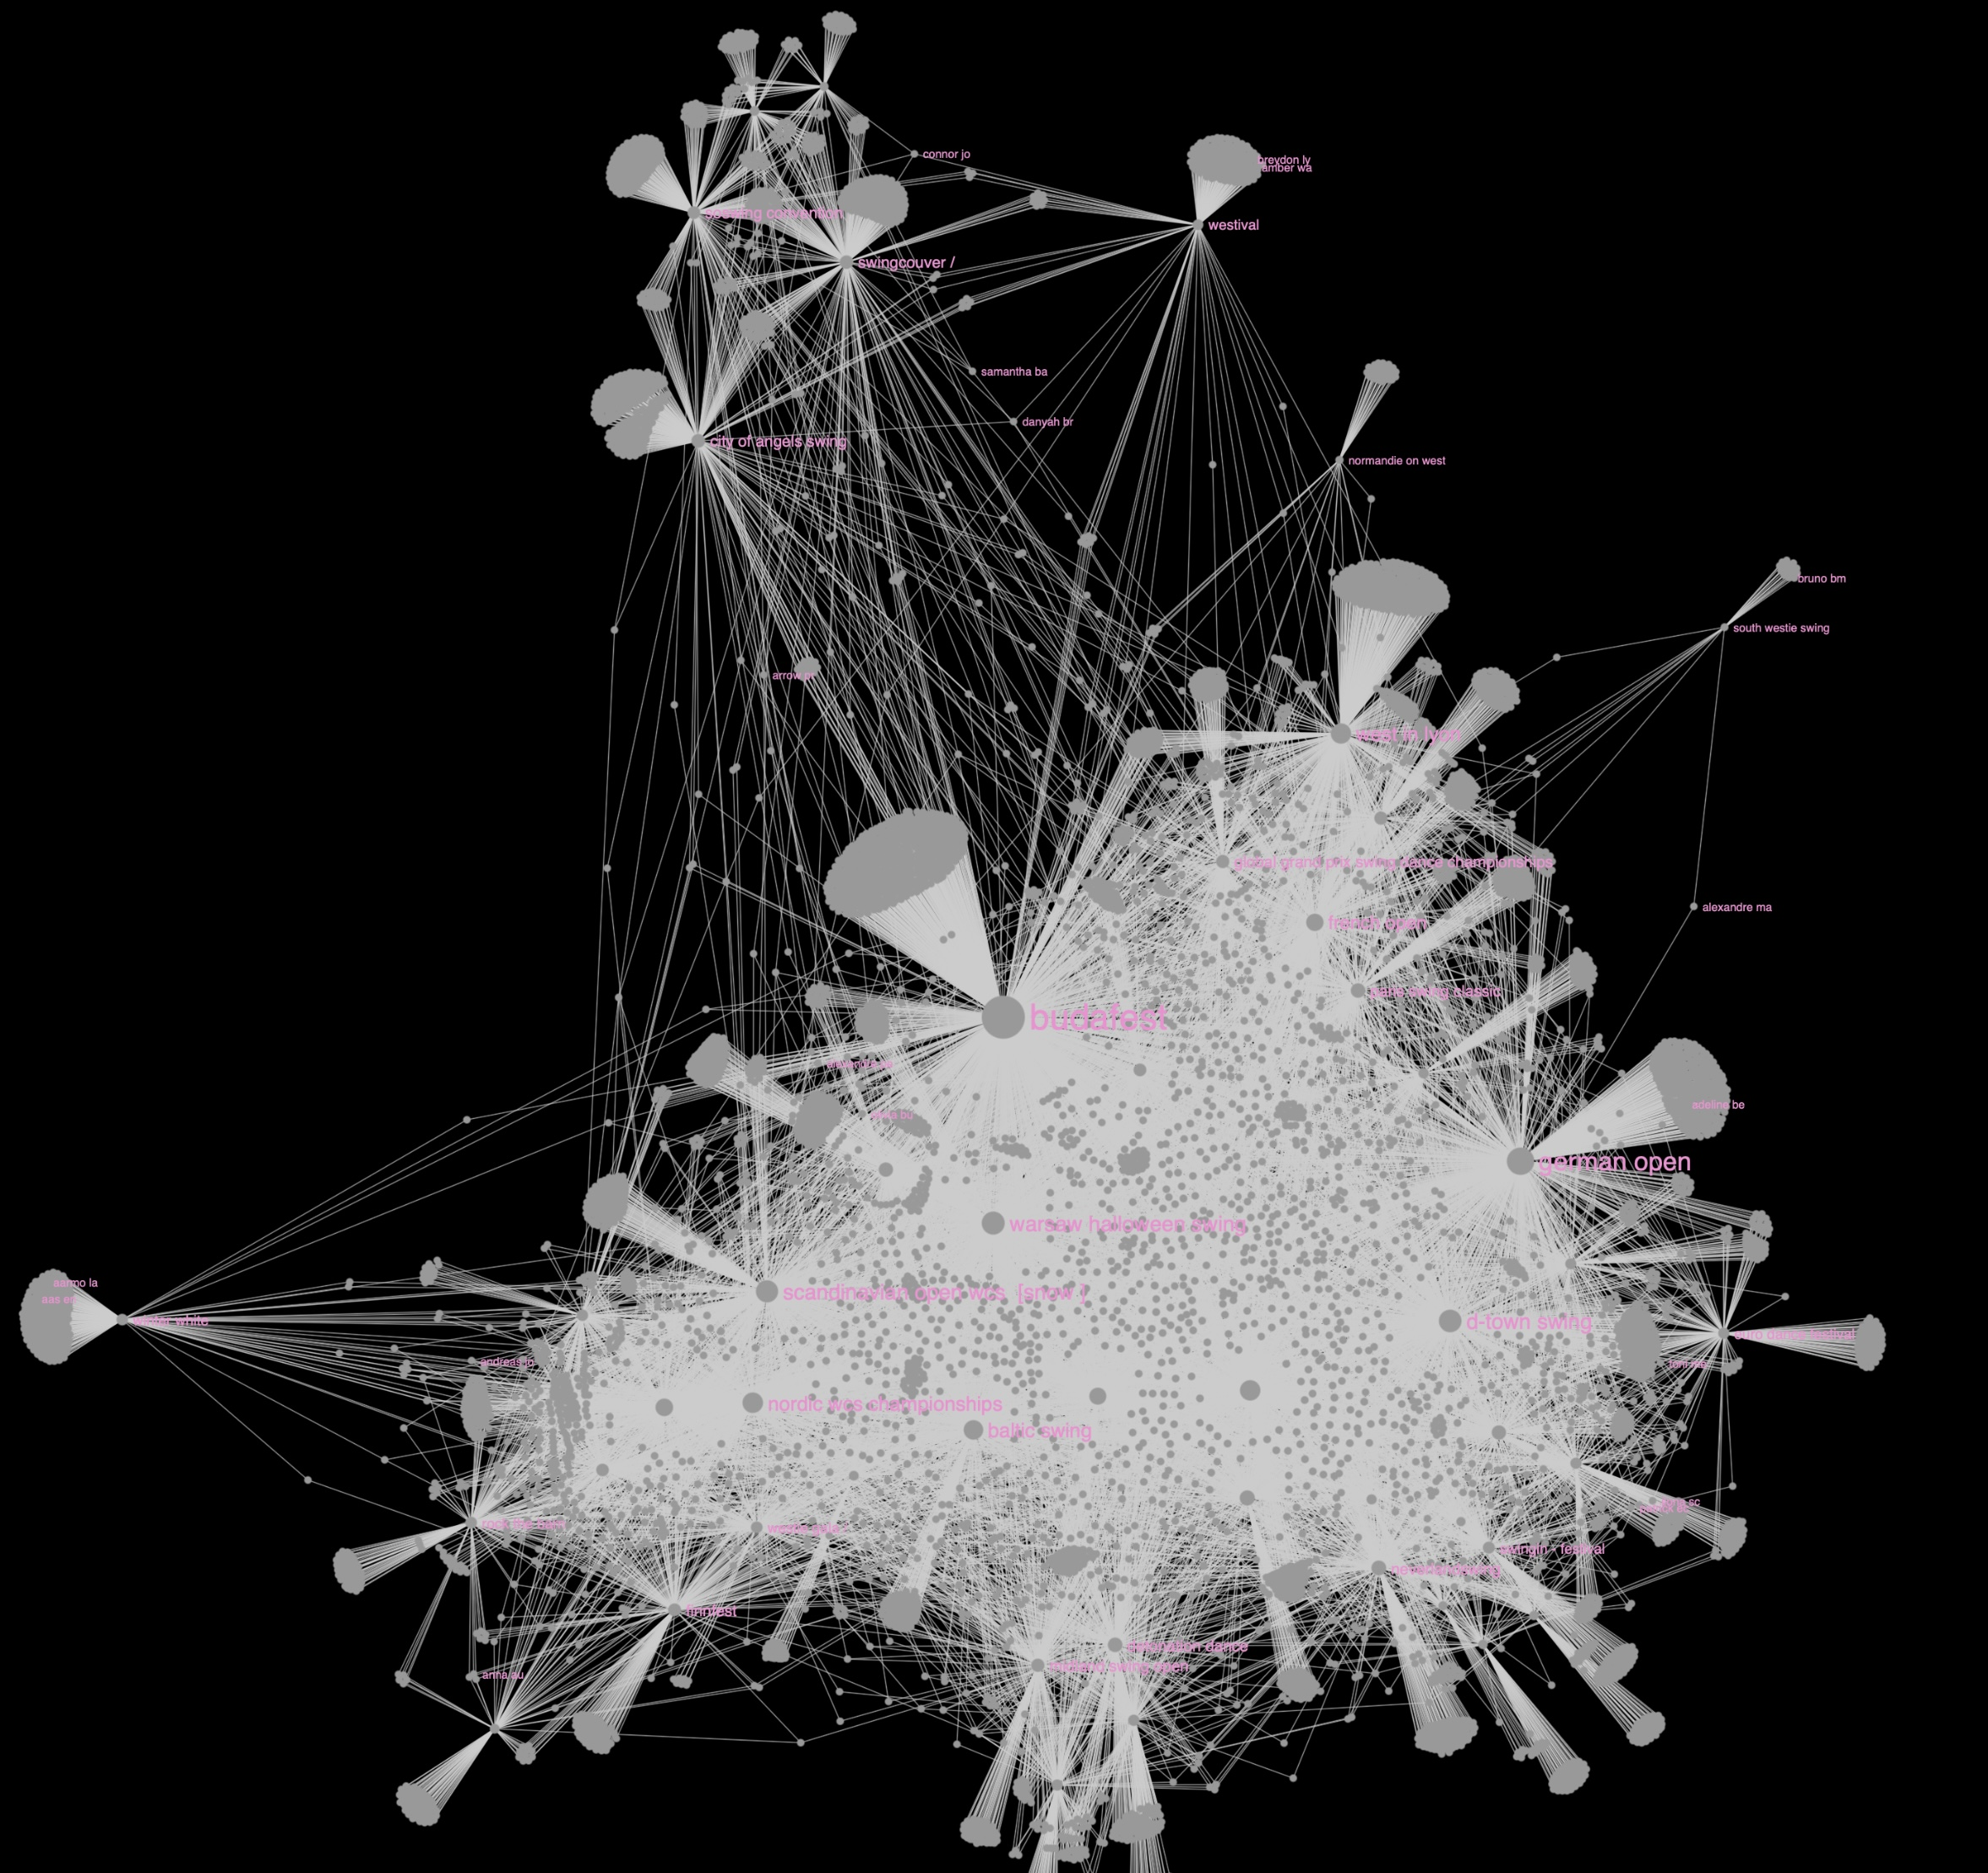

In [28]:
##this is just because the notebook won't display the above graph on github
from IPython.display import Image
Image(filename='wsdc_node_graph.jpg') 

.

.

.

.

.

.

.

.

.

## ---TBD--- Scraping WSDC database data ---TBD---
This will be updated later. You can peek if you want to, but it's messy 😬

In [269]:
# !pip install ipysigma polars networkx --upgrade

import networkx as nx
import polars as pl
from ipysigma import Sigma



G = nx.from_edgelist(list(pl.concat([pl.read_parquet('wsdc_for_gonk.parquet')
                                    .with_columns(pl.col('dominate_data.dancer.wscid')
                                                     .str.to_lowercase()
                                                     .str.replace_all(r'\d', '')
                                                     .str.strip_chars()
                                                     .alias('competitor'),
                                                  pl.col('id')
                                                   .cast(pl.String)
                                                   .replace({k:v for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()})
                                                   .str.to_lowercase()
                                                 )
                                   .drop('event_id', 'dominate_data.dancer.wscid'),
                                     
                                   pl.read_csv('competitor_event.csv')
                                    .with_columns(pl.all().str.to_lowercase()
                                                   .str.replace_all(r'\d', '')
                                                   .str.strip_chars())
                                  ], 
                                  how='diagonal')
                            .with_columns(eq_event = pl.col('event')
                                                      .map_elements(lambda x: [i for i in {v.lower() for k,v in list(pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows())} if x in i], 
                                                                   return_dtype=pl.List(pl.String)
                                                                  )
                                         )
                            .explode('eq_event')
                             .with_columns(event_name = pl.when(pl.col('eq_event').is_not_null())
                                                          .then(pl.concat_list('id', 'eq_event')
                                                                               .list.unique()
                                                                               .list.drop_nulls()
                                                                               .list.sort()
                                                               )
                                                           .otherwise(pl.concat_list(['id', 'event'])
                                                                        .list.unique()
                                                                        .list.drop_nulls()
                                                                        .list.sort()
                                                                     )
                                          )
                          .explode('event_name')
                          .select('competitor', 'event_name')
                          .unique()
                          .drop_nulls()
                         .iter_rows()
                        )
                    )
# G = nx.from_edgelist(list(pl.read_csv('meme_edge_list.csv').iter_rows()))
# G.remove_node('')

Sigma(G, 
      node_size=G.degree, 
      node_label_size=G.degree,
      background_color='black',
      node_label_color='white',
      # default_edge_type="curve",
      # start_layout=30,
     )

Sigma(nx.Graph with 17,273 nodes and 52,104 edges)

In [14]:
(pl.read_csv('competitor_event.csv')

  .with_columns(pl.col('event')
                .str.replace_all(r'\d', '')
                .str.strip_chars())
 # .filter(pl.col('competitor') == '')
  .drop_nulls()
 # .iter_rows()
)

event,competitor
str,str
"""Rock The Barn""","""Jaana Sa"""
"""Sea Sun & Swing Camp""","""Priscilla Be"""
"""City of Angels Swing""","""Rachel My"""
"""Baltic Swing""","""Guy Be"""
"""French Open""","""Olivia We"""
…,…
"""Nordic WCS Champions…","""Pawel Sz"""
"""Slovenian Open""","""Miriam Ze"""
"""Budafest""","""Diana-Cristina Ia"""


In [15]:
(pl.read_parquet('wsdc_for_gonk.parquet')
     .drop('event_id')
     .with_columns(pl.col('dominate_data.dancer.wscid')
                   .str.to_lowercase()
                   .str.replace_all(r'\d', '')
                   .str.strip_chars())
     .drop_nulls()
     # .iter_rows()
    )

dominate_data.dancer.wscid,id
str,i64
"""tina aalto""",159
"""tina aalto""",159
"""laila aarmo""",263
"""laila aarmo""",263
"""laila aarmo""",222
…,…
"""tetsuya ugajin""",20
"""tetsuya ugajin""",104
"""tetsuya ugajin""",104


In [24]:
# {k:v for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()}
# {v:k for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()}
sorted(list(v.lower() for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()))

['4th of july swing bash',
 '5280 swing dance championships \n5280 westival',
 'all star swingjam',
 'american lindy hop championships',
 'americano dance camp \namericano dance camp',
 'americas classic',
 'anchor festival',
 'anti valentines',
 'arizona dance classic  \narizona dance classic \narizona dance classic (cancelled due to covid-19)',
 'asia west coast swing open \nasia wcs open xi \nasia wcs open - 10th anniversary',
 'asian wcs open swingvitation',
 'atlanta swing classic',
 'austin rocks',
 'austin swing dance championships \naustin swing dance championships (asdc)',
 'australasian wcs & zouk champs',
 'australian open swing dance championships',
 'austrian open',
 'austrian wcs spectacle',
 'autumn swing challenge',
 'avignon city swing',
 'baltic swing',
 'bavarian open wcs \nbavarian open \nbavarian open west coast swing championships',
 'bay swingers',
 'berlin swing revolution',
 'best of the best \nbest of the best wcs',
 'big apple dance festival',
 'big apple dan

In [17]:
(pl.read_csv('competitor_event.csv')
  .with_columns(pl.col('event')
                .str.to_lowercase()
                .str.replace_all(r'\d', '')
                .str.strip_chars(),
                pl.col('competitor')
                .str.to_lowercase()
               )
  .drop_nulls())

event,competitor
str,str
"""rock the barn""","""jaana sa"""
"""sea sun & swing camp""","""priscilla be"""
"""city of angels swing""","""rachel my"""
"""baltic swing""","""guy be"""
"""french open""","""olivia we"""
…,…
"""nordic wcs champions…","""pawel sz"""
"""slovenian open""","""miriam ze"""
"""budafest""","""diana-cristina ia"""


In [ ]:
list(pl.concat([pl.read_parquet('wsdc_for_gonk.parquet')
            
            .with_columns(pl.col('dominate_data.dancer.wscid')
                             .str.to_lowercase()
                             .str.replace_all(r'\d', '')
                             .str.strip_chars()
                             .alias('competitor'),
                          pl.col('id')
                           .cast(pl.String)
                           .replace({k:v for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()})
                           .str.to_lowercase()
                         )
           .drop('event_id', 'dominate_data.dancer.wscid')
           , 
           
           pl.read_csv('competitor_event.csv')
            .with_columns(pl.all().str.to_lowercase()
                           .str.replace_all(r'\d', '')
                           .str.strip_chars())
          ], 
          how='diagonal')
    .with_columns(eq_event = pl.col('event')
                              .map_elements(lambda x: [i for i in {v.lower() for k,v in list(pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows())} if x in i], 
                                           return_dtype=pl.List(pl.String)
                                          )
                 )
    .explode('eq_event')
     .with_columns(event_name = pl.when(pl.col('eq_event').is_not_null())
                                  .then(pl.concat_list('id', 'eq_event')
                                                       .list.unique()
                                                       .list.drop_nulls()
                                                       .list.sort()
                                       )
                                   .otherwise(pl.concat_list(['id', 'event'])
                                                .list.unique()
                                                .list.drop_nulls()
                                                .list.sort()
                                             )
                  )
  .explode('event_name')
  .select('competitor', 'event_name')
  .unique()
 .iter_rows()
)



In [217]:
x = 'snow'
[i for i in {v.lower() for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()} if x in i][0]

'scandinavian open wcs \nscandinavian open wcs 2022 \nscandinavian open \nscandinavian open wcs "snow"'

### save to file and sanitize slightly

In [252]:
(pl.concat([pl.read_parquet('wsdc_for_gonk.parquet')
                                    .with_columns(pl.col('dominate_data.dancer.wscid')
                                                     .str.to_lowercase()
                                                     .str.replace_all(r'\d', '')
                                                     .str.strip_chars()
                                                     .alias('competitor'),
                                                  pl.col('id')
                                                   .cast(pl.String)
                                                   .replace({k:v for k,v in pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows()})
                                                   .str.to_lowercase()
                                                 )
                                   .drop('event_id', 'dominate_data.dancer.wscid'),
                                     
                                   pl.read_csv('competitor_event.csv')
                                    .with_columns(pl.all().str.to_lowercase()
                                                   .str.replace_all(r'\d', '')
                                                   .str.strip_chars())
                                  ], 
                                  how='diagonal')
                            .with_columns(eq_event = pl.col('event')
                                                      .map_elements(lambda x: [i for i in {v.lower() for k,v in list(pl.read_parquet('wsdc_events_and_ids.parquet').iter_rows())} if x in i], 
                                                                   return_dtype=pl.List(pl.String)
                                                                  )
                                         )
                            .explode('eq_event')
                             .with_columns(event_name = pl.when(pl.col('eq_event').is_not_null())
                                                          .then(pl.concat_list('id', 'eq_event')
                                                                               .list.unique()
                                                                               .list.drop_nulls()
                                                                               .list.sort()
                                                               )
                                                           .otherwise(pl.concat_list(['id', 'event'])
                                                                        .list.unique()
                                                                        .list.drop_nulls()
                                                                        .list.sort()
                                                                     )
                                          )
                          .explode('event_name')
                          .select('competitor', 'event_name')
                          .unique()
                          .drop_nulls()
 .with_columns(pl.col('competitor').str.extract(r'^\S+\s\S{2}', 0)) #first name + first 2 letters of last name
 .drop_nulls()
 .unique()
 # .write_parquet('mostly_clean_slightly_sanitized_competitor_event_edge_list.parquet')
 .write_csv('mostly_clean_slightly_sanitized_competitor_event_edge_list.csv')
)